 Tutaj zaimportuj wymagane biblioteki

In [1]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import numpy as np

 ## Połączenie z bazą danych
 Tutaj uzupełnij konfigurację połączenia

In [2]:
username = 'postgres'
password = 'password'

host = 'localhost'
database = 'airlines'
port = 5432

 Tutaj stwórz zmienną engine, która zostanie użyta do połączenia z bazą danych

In [3]:
url_object = URL.create(
    "postgresql+psycopg2",
    username="postgres",
    password="password",  
    host="localhost",
    database="airlines",
)

engine = create_engine(url_object)
connection = engine.connect()

 Tutaj uzupełnij implementację metody `read_sql_table`

In [4]:
flight_df_raw = pd.read_sql_table('flight', connection)

 Tutaj zaczytaj zapisaną wcześniej ramkę danych `flight_df` do zmniennej o takiej samej nazwie

In [5]:
flight_df = pd.read_csv(r'C:\Users\admin\Desktop\Koncowego_sprawdzony\notebooks\flight_delays.csv')

Sprawdzenie poprawności danych w ramce `flight_df` 

In [6]:
flight_df_expected_rows_amount = 1057391
flight_df_rows_amount = flight_df.shape[0]

assert flight_df_rows_amount == flight_df_expected_rows_amount, f'Oczekiwano {flight_df_expected_rows_amount} wierszy, otrzymano {flight_df_rows_amount}'

 Tutaj wczytaj tabelę `aircraft` używając `read_sql_table`

In [7]:
aircraft_df = pd.read_sql_table('aircraft', connection)

 Tutaj usuń kolumny `number_of_seats`, `id` oraz duplikaty z ramki `aircraft_df`

In [8]:
aircraft_df.drop(['number_of_seats', 'id'], axis=1, inplace=True)
aircraft_df.drop_duplicates(inplace=True)
aircraft_df

,manufacture_year,tail_num
0,1944,N54514
1,1945,N1651M
2,1953,N100CE
3,1953,N141FL
4,1953,N151FL
...,...,...
7378,2019,N14011
7379,2019,N16008
7380,2019,N16009
7381,2019,N2250U


In [12]:
aircraft_df['manufacture_year'] = aircraft_df.groupby('tail_num')['manufacture_year'].transform(max)

aircraft_df.drop_duplicates(inplace=True)

aircraft_df.reset_index(drop=True, inplace=True)
aircraft_df

,manufacture_year,tail_num
0,1944,N54514
1,1945,N1651M
2,1953,N100CE
3,1953,N141FL
4,1953,N151FL
...,...,...
7356,2019,N14011
7357,2019,N16008
7358,2019,N16009
7359,2019,N2250U


 Tutaj dokonaj złączenia `flight_df` z `aircraft_df`, wynik zapisz do `tmp_flight_df`

In [14]:
tmp_flight_df = flight_df.merge(aircraft_df, on='tail_num', how='left')
tmp_flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100.0,2005.0
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100.0,2016.0
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,4.0,0.0,10.0,0.0,3.0,2019,False,True,1100.0,1998.0
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100.0,1998.0
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,500.0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,500.0,2017.0
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,...,5.0,0.0,19.0,0.0,0.0,2019,True,False,1000.0,1992.0
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,500.0,1992.0
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,0.0,66.0,0.0,0.0,2019,True,False,1000.0,2016.0


 Tutaj dokonaj sprawdzenia, czy nie pojawiły się duplikaty

In [15]:
print(tmp_flight_df.duplicated().sum())

0


 Tutaj nadpisz `flight_df` używając `tmp_flight_df`

In [16]:
flight_df = tmp_flight_df
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100.0,2005.0
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100.0,2016.0
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,4.0,0.0,10.0,0.0,3.0,2019,False,True,1100.0,1998.0
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100.0,1998.0
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,500.0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,500.0,2017.0
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,...,5.0,0.0,19.0,0.0,0.0,2019,True,False,1000.0,1992.0
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,500.0,1992.0
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,0.0,66.0,0.0,0.0,2019,True,False,1000.0,2016.0


 ## Opóźnienia vs. rok produkcji samolotu cz. 1
 Tutaj wyznacz zależność roku produkcji do częstotliwości opóźnień

In [17]:
delays_by_manufacture_year_df = flight_df.groupby('manufacture_year')['is_delayed'].mean().reset_index(name='delay_frequency')

flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100.0,2005.0
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100.0,2016.0
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,4.0,0.0,10.0,0.0,3.0,2019,False,True,1100.0,1998.0
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,1100.0,1998.0
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,NaN,NaN,NaN,NaN,NaN,2019,False,True,500.0,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,500.0,2017.0
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,...,5.0,0.0,19.0,0.0,0.0,2019,True,False,1000.0,1992.0
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,NaN,NaN,NaN,NaN,2019,False,False,500.0,1992.0
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,0.0,66.0,0.0,0.0,2019,True,False,1000.0,2016.0


 Tutaj wyrysuj ramkę `delays_by_manufacture_year_df`

In [18]:
delays_by_manufacture_year_df_filtered = delays_by_manufacture_year_df[delays_by_manufacture_year_df['delay_frequency'] > 10000].copy()


 Tutaj zmodyfikuj wykres tak, aby prezentował tylko te roczniki, które odbyły więcej niż 10000 lotów

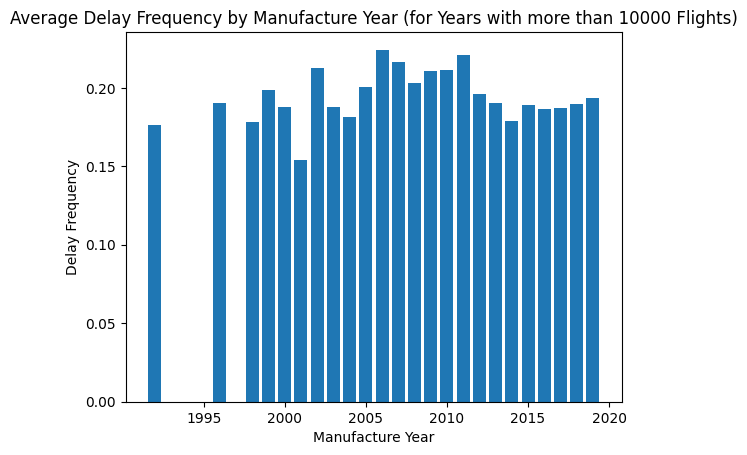

In [19]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only manufacture years with more than 10000 flights
delays_by_manufacture_year_df_filtered = delays_by_manufacture_year_df[
    delays_by_manufacture_year_df['manufacture_year'].isin(
        flight_df['manufacture_year'].value_counts()[flight_df['manufacture_year'].value_counts() > 10000].index
    )
]

# Create the plot
plt.bar(
    delays_by_manufacture_year_df_filtered['manufacture_year'],
    delays_by_manufacture_year_df_filtered['delay_frequency'],
)

# Set the plot title and axis labels
plt.title('Average Delay Frequency by Manufacture Year (for Years with more than 10000 Flights)')
plt.xlabel('Manufacture Year')
plt.ylabel('Delay Frequency')

# Show the plot
plt.show()

 ## Opóźnienia vs. rok produkcji samolotu cz. 2
 Dokonaj agregacji kolumny `manufacture_year` do kolumny `manufacture_year_agg` zgodnie z poniższym:
 1. Grupując dane co 3 lata -> Czy po grupowaniu można zauważyć zależność? Wyniki zapisz do ramki `flight_delays_by_manufacture_year_agg_df`.
 1. Wyznacz top 5 roczników samolotu, które wykonały najwięcej lotów. Wyniki zapisz do ramki `top_manufactured_df`, do obliczeń wykorzystaj `delays_by_manufacture_year_df`.

 Tutaj dodaj kolumnę `manufacture_year_agg` do ramki `flight_df`

In [20]:
flight_df['manufacture_year_agg'] = pd.cut(flight_df['manufacture_year'], 
                                           bins= np.arange(1950, 2024, 3),
                                           labels= np.arange(1950, 2020, 3))


 Tutaj stwórz zmienną `flight_delays_by_manufacture_year_agg_df`

In [21]:
# Agregacja danych
delays_by_manufacture_year_agg_df = flight_df.groupby(['manufacture_year_agg'])['id'].count()

flight_delays_by_manufacture_year_agg_df = pd.DataFrame({'Manufacture Year Agg': delays_by_manufacture_year_agg_df.index,
                                                         'Flight count': delays_by_manufacture_year_agg_df.values})

 Tutaj stwórz wykres w oparciu o dane zawarte w `flight_delays_by_manufacture_year_agg_df`

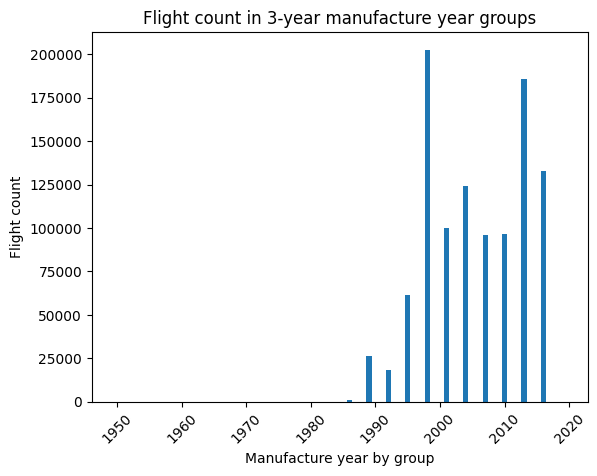

In [22]:
import matplotlib.pyplot as plt

    
plt.bar(flight_delays_by_manufacture_year_agg_df['Manufacture Year Agg'], 
        flight_delays_by_manufacture_year_agg_df['Flight count']) 
plt.xticks(rotation=45)
plt.xlabel('Manufacture year by group')
plt.ylabel('Flight count')
plt.title('Flight count in 3-year manufacture year groups')

plt.show()

Tutaj wyznacz TOP 5 roczników produkcji - czyli sortując według liczby wykonanych lotów, pamiętaj o wyświetleniu również wartości opóźnienia.

In [23]:
# Top 5 roczników samolotów z największą liczbą wykonanych lotów i łącznym czasem opóźnień
top_5_years = flight_delays_by_manufacture_year_agg_df.sort_values('Flight count', ascending=False).head(5)
top_5_years

,Manufacture Year Agg,Flight count
16,1998,202484
21,2013,185745
22,2016,132641
18,2004,124377
17,2001,100192


In [24]:
flight_df.to_csv('flight_df_02.csv', index=False)